Week 8 exploration

# Setup

In [8]:
import os
import glob
import itertools as it

import cv2
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image

import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

from pylibdmtx.pylibdmtx import decode
from ultralytics import YOLO, settings
root_dir = os.getcwd().replace('\\notebooks', '')
settings.update({'datasets_dir': f'{root_dir}/data/processed/test', 'runs_dir': f'{root_dir}/yolo/runs'})

# 1 - Histogram Analysis

From YOLO crops, create histogram plots and analyse all test images.

In [ ]:
# Getting cropped images
model = YOLO('../yolo/models/ultralytics_finetuned.pt')

# All MAN images
img_paths = glob.glob('../data/extracted/*')
img_paths.remove('../data/extracted\\info.csv')

images = []
for img_path in img_paths:
    img = cv2.imread(img_path)
    results = model(img)
    boxes = results[0].boxes.xyxy.tolist()

    if boxes != None and len(boxes) > 0:
        # only look at box with highest confidence
        box = boxes[0]

        # crop with some padding (to not have too small of a crop)
        pad = 10
        crop_obj = img[max(0, int(box[1])-pad):max(0, int(box[3])+pad), max(0, int(box[0])-pad):max(0, int(box[2])+pad)]

        images.append(crop_obj)


0: 480x640 1 Data Matrix, 30.0ms
Speed: 4.0ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Data Matrix, 41.0ms
Speed: 3.0ms preprocess, 41.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 576x640 1 Data Matrix, 17.0ms
Speed: 5.0ms preprocess, 17.0ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)

0: 480x640 1 Data Matrix, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 640x448 1 Data Matrix, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

0: 480x640 1 Data Matrix, 17.0ms
Speed: 3.0ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Data Matrix, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Data Matrix, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms 

In [60]:
len(images)

174

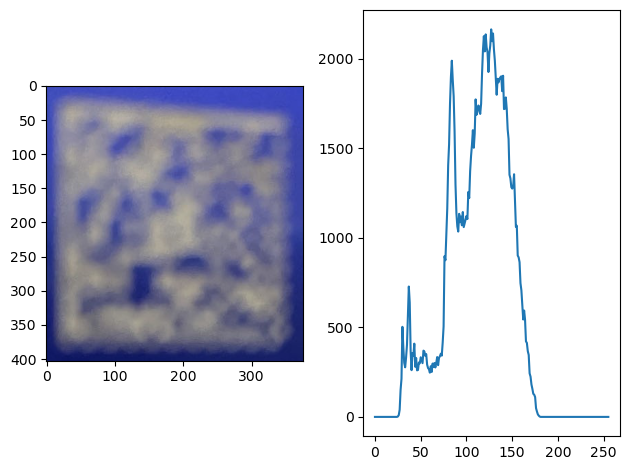

In [65]:
# create histograms from cropped images
def create_hist(img):
    # grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    return hist

hists = [create_hist(img) for img in images]

# combine histograms with images
for idx, img_hist in enumerate(zip(images, hists)):
    img, hist = img_hist
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.plot(hist)
    plt.tight_layout()
    plt.show()

    break

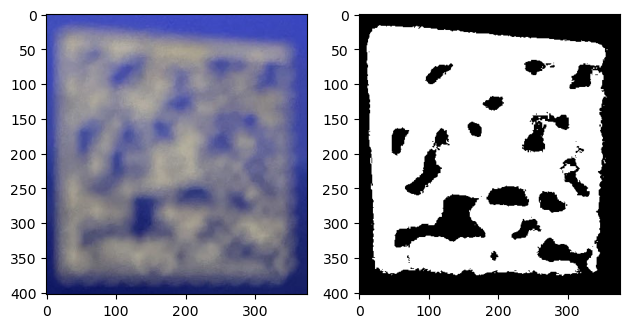

In [66]:
# Binarize with Otsu's method
def binarize(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img

binarized_imgs = [binarize(img) for img in images]

# combine binarized images with original images
for idx, img_bin in enumerate(zip(images, binarized_imgs)):
    img, img_bin = img_bin
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(img_bin, cmap='gray')
    plt.tight_layout()
    plt.show()
    break

## Pipeline with step 2 Otsu's binarization


0: 640x640 1 Data Matrix, 6.0ms
Speed: 2.8ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


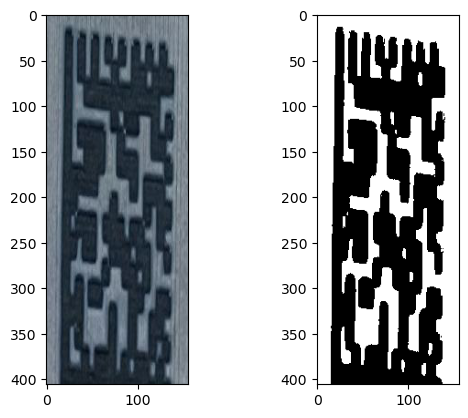


0: 640x640 1 Data Matrix, 106.1ms
Speed: 10.0ms preprocess, 106.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


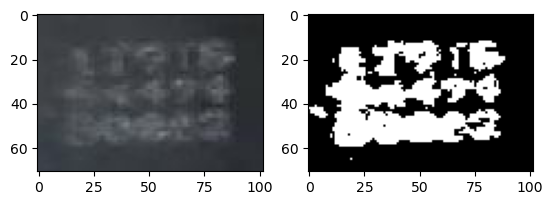


0: 640x640 1 Data Matrix, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


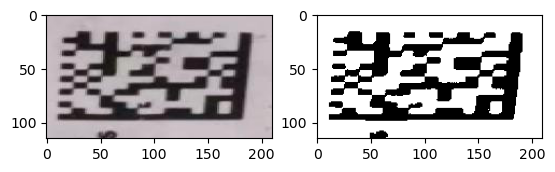


0: 640x640 1 Data Matrix, 19.0ms
Speed: 4.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


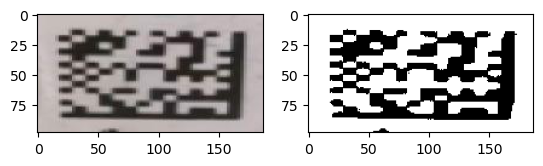

Valid decoding! 250115190210016

0: 640x640 1 Data Matrix, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


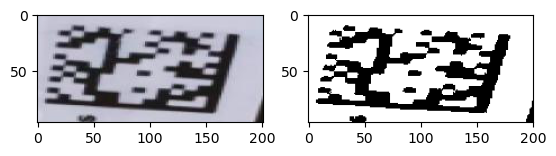


0: 640x640 1 Data Matrix, 72.8ms
Speed: 5.0ms preprocess, 72.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


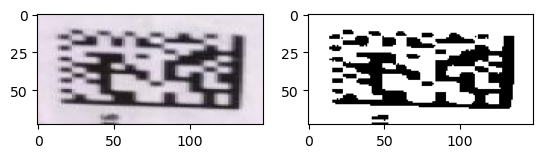


0: 640x640 1 Data Matrix, 177.2ms
Speed: 5.0ms preprocess, 177.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


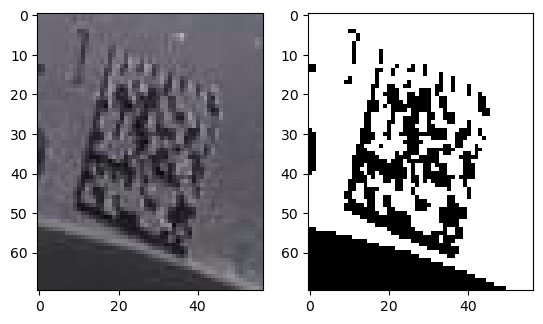


0: 640x640 1 Data Matrix, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


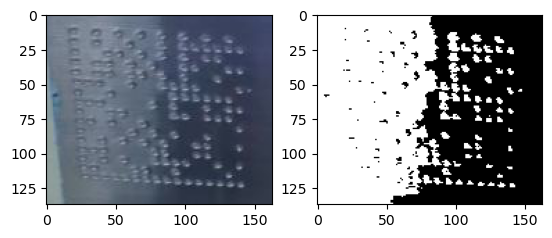


0: 640x640 1 Data Matrix, 6.0ms
Speed: 3.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


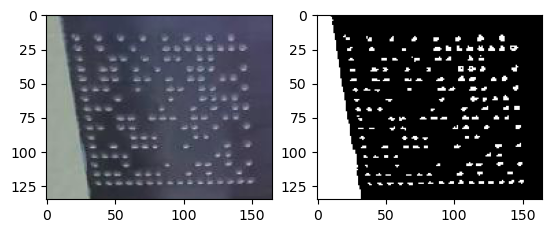


0: 640x640 1 Data Matrix, 6.0ms
Speed: 3.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


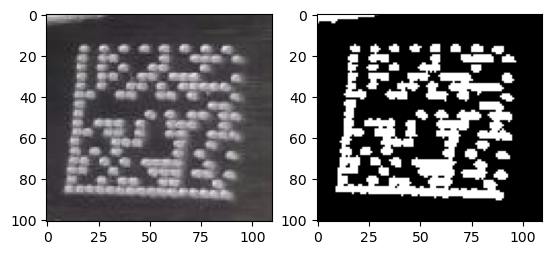


0: 640x640 1 Data Matrix, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


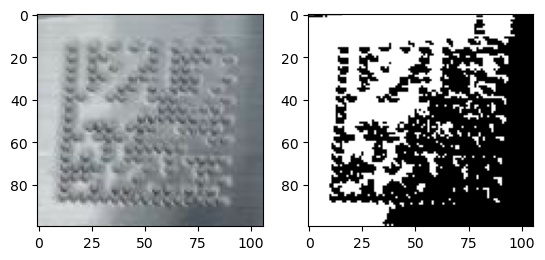


0: 640x640 2 Data Matrixs, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


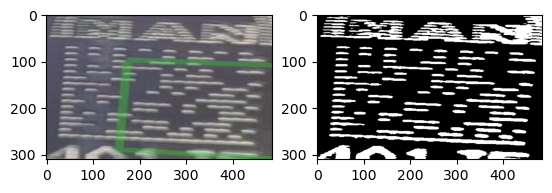


0: 640x640 1 Data Matrix, 60.6ms
Speed: 4.0ms preprocess, 60.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


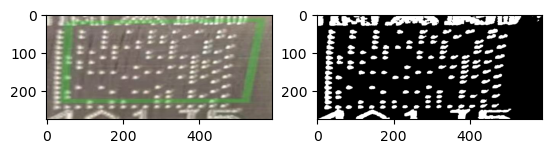


0: 640x640 2 Data Matrixs, 109.8ms
Speed: 17.0ms preprocess, 109.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


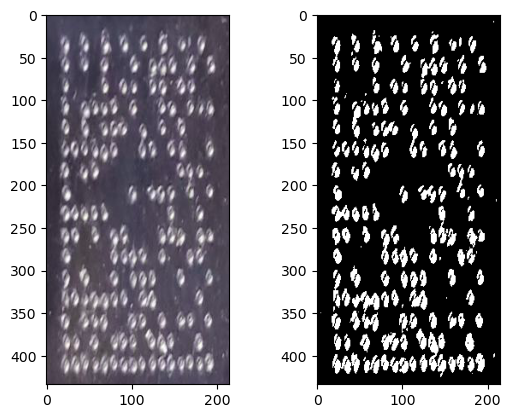


0: 640x640 1 Data Matrix, 16.4ms
Speed: 7.5ms preprocess, 16.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


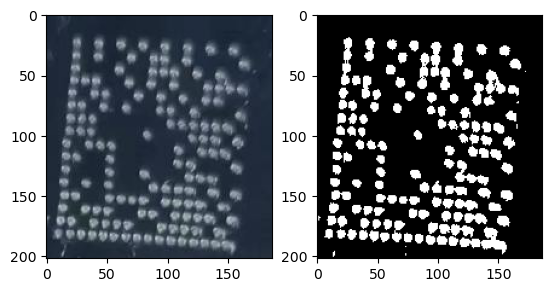


0: 640x640 (no detections), 20.0ms
Speed: 3.0ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Data Matrix, 17.2ms
Speed: 3.0ms preprocess, 17.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


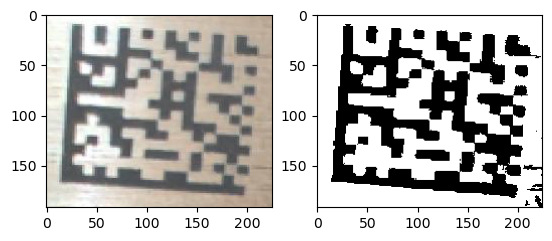

Valid decoding! 4F1K99136940006

0: 640x640 1 Data Matrix, 17.3ms
Speed: 8.0ms preprocess, 17.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


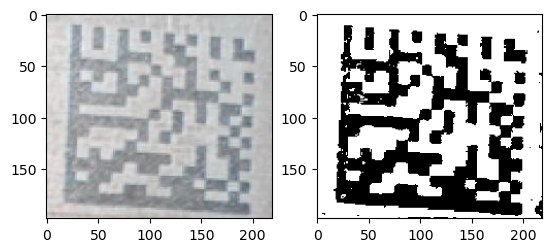


0: 640x640 3 Data Matrixs, 80.9ms
Speed: 3.0ms preprocess, 80.9ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


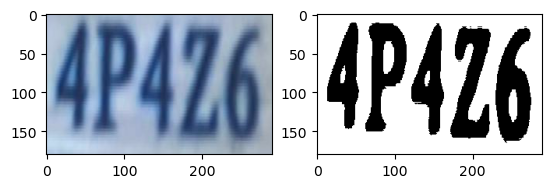


0: 640x640 1 Data Matrix, 60.1ms
Speed: 4.0ms preprocess, 60.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


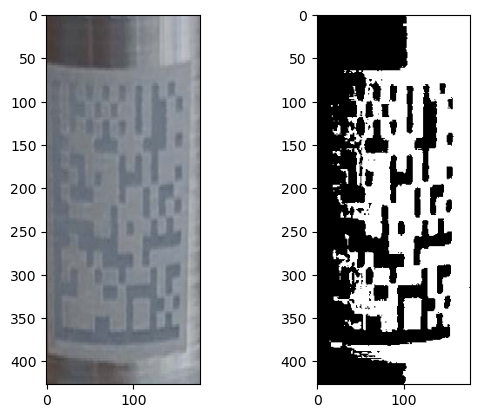


0: 640x640 (no detections), 121.4ms
Speed: 16.0ms preprocess, 121.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Data Matrix, 115.6ms
Speed: 4.0ms preprocess, 115.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


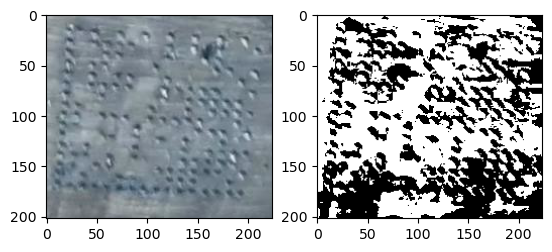


0: 640x640 2 Data Matrixs, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


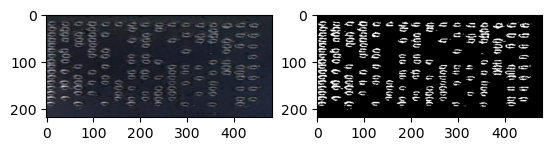


0: 640x640 1 Data Matrix, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


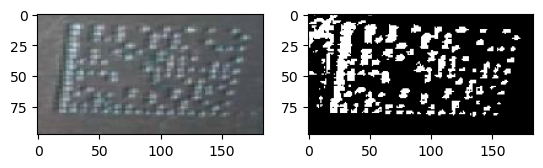


0: 640x640 1 Data Matrix, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


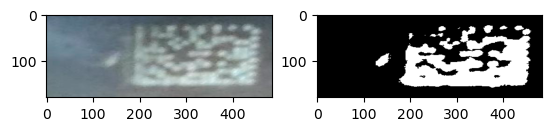


0: 640x640 (no detections), 123.1ms
Speed: 19.0ms preprocess, 123.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Data Matrix, 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


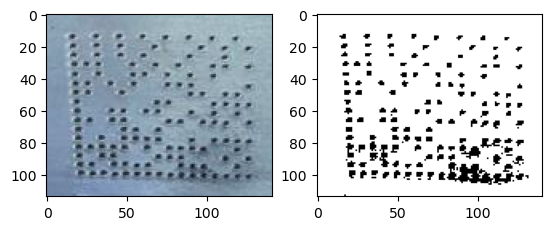


0: 640x640 2 Data Matrixs, 17.9ms
Speed: 3.0ms preprocess, 17.9ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


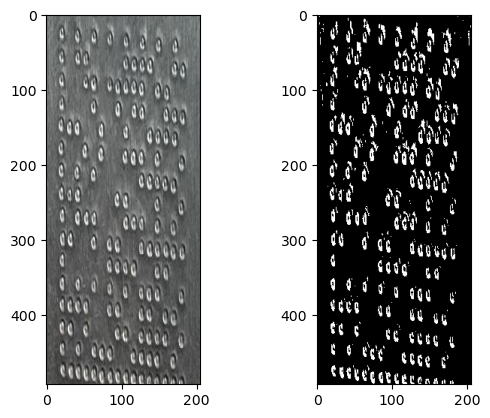


0: 640x640 3 Data Matrixs, 20.1ms
Speed: 3.0ms preprocess, 20.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


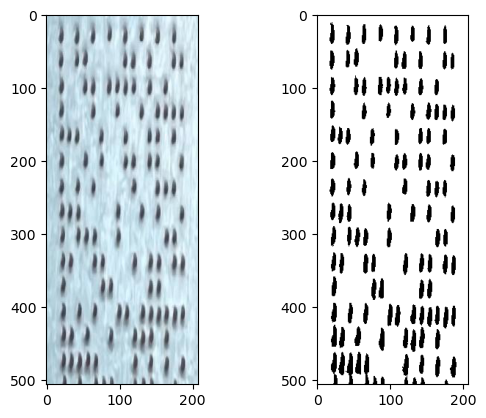


0: 640x640 1 Data Matrix, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


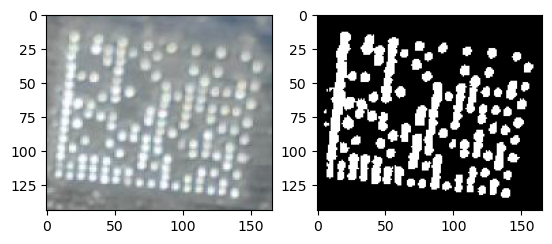


0: 640x640 1 Data Matrix, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


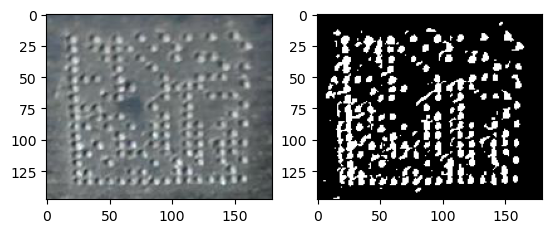


0: 640x640 1 Data Matrix, 16.7ms
Speed: 3.0ms preprocess, 16.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


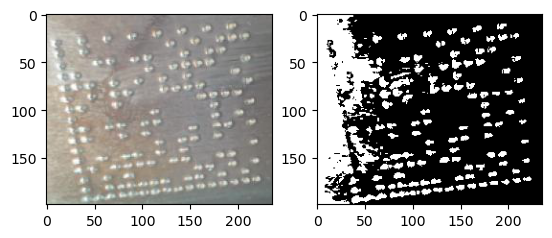


0: 640x640 1 Data Matrix, 115.1ms
Speed: 4.0ms preprocess, 115.1ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


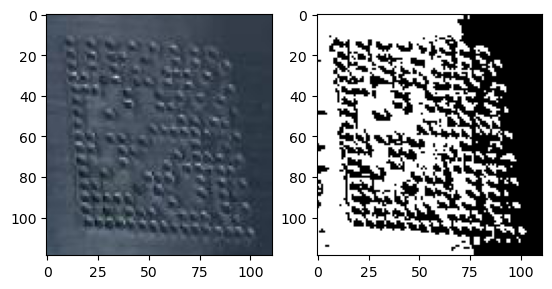


0: 640x640 1 Data Matrix, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


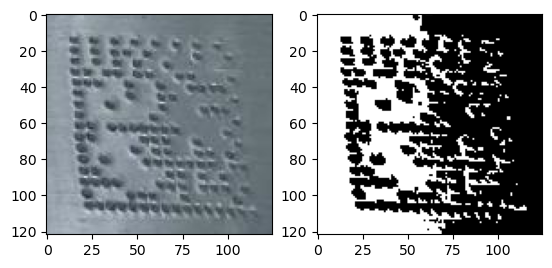


0: 640x640 2 Data Matrixs, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


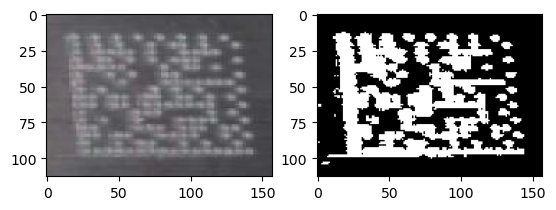


0: 640x640 1 Data Matrix, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


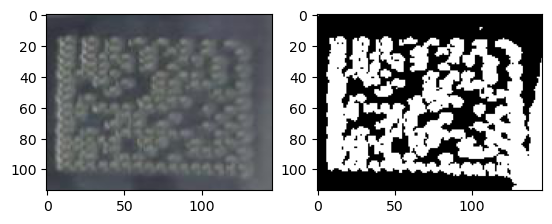


0: 640x640 1 Data Matrix, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


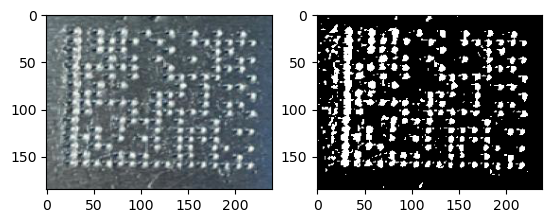


0: 640x640 1 Data Matrix, 121.7ms
Speed: 4.0ms preprocess, 121.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


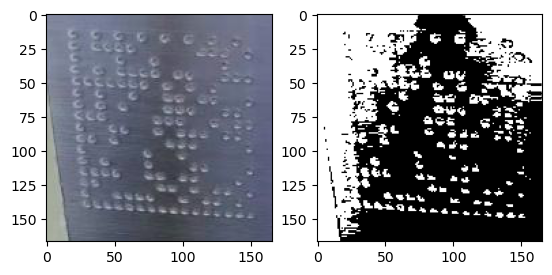


0: 640x640 1 Data Matrix, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


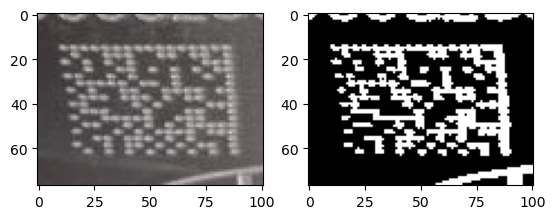

Valid decoding! 9E4T59892670006

0: 640x640 1 Data Matrix, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


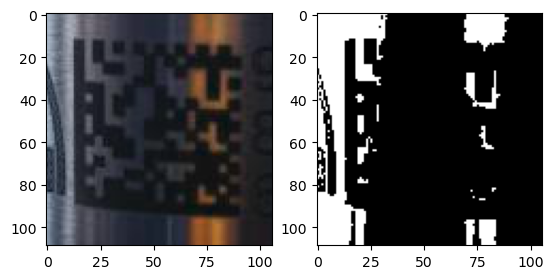


0: 640x640 1 Data Matrix, 17.5ms
Speed: 3.0ms preprocess, 17.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


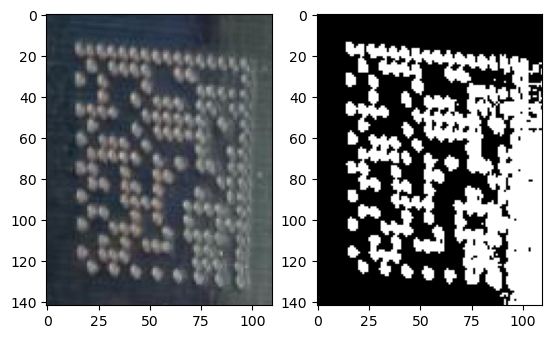


0: 640x640 1 Data Matrix, 17.0ms
Speed: 3.0ms preprocess, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


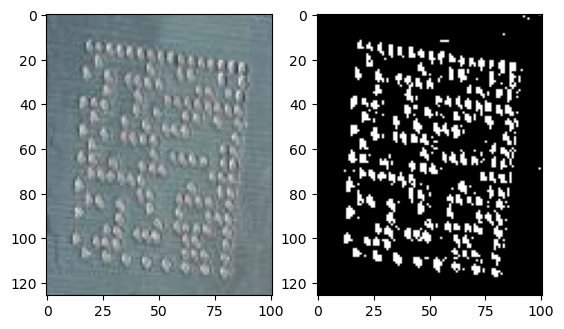


0: 640x640 5 Data Matrixs, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


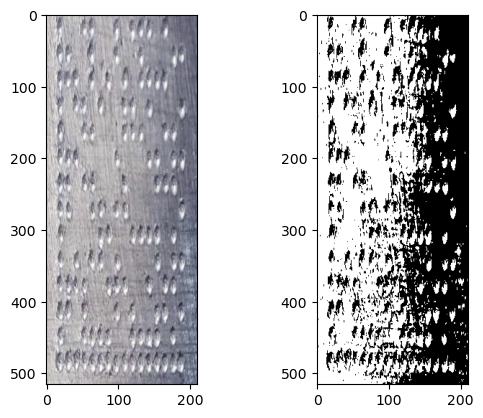


0: 640x640 1 Data Matrix, 283.0ms
Speed: 4.0ms preprocess, 283.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


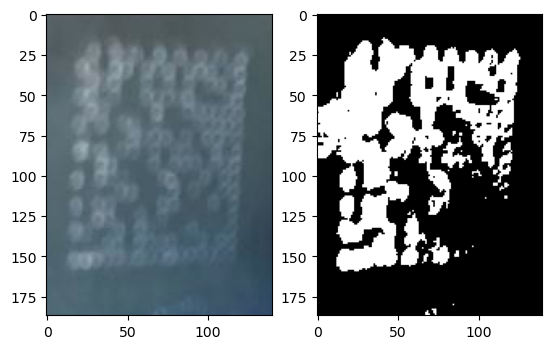


0: 640x640 1 Data Matrix, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


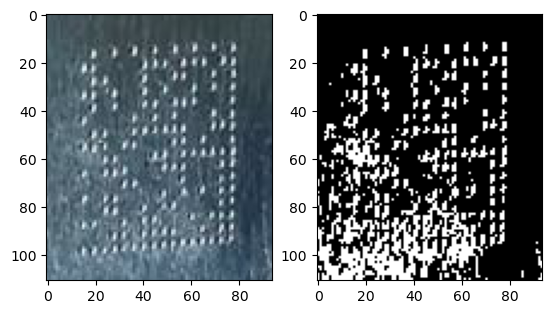


0: 640x640 1 Data Matrix, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


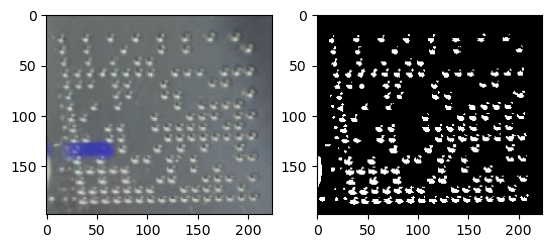


0: 640x640 1 Data Matrix, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


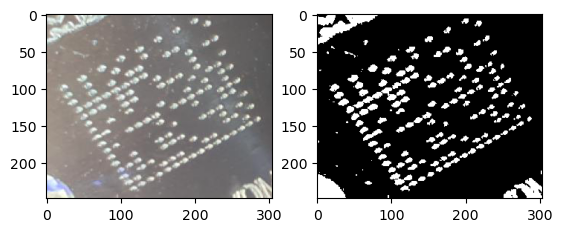


0: 640x640 1 Data Matrix, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


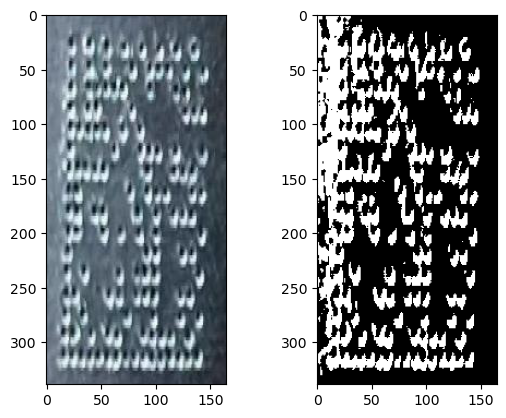


0: 640x640 1 Data Matrix, 20.8ms
Speed: 3.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


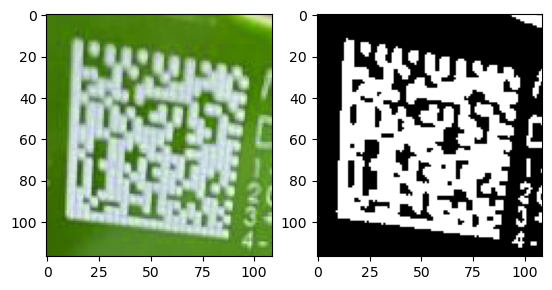

Valid decoding! #D1FPE50HA9NS0047XG264##KV8INMEP

0: 640x640 1 Data Matrix, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


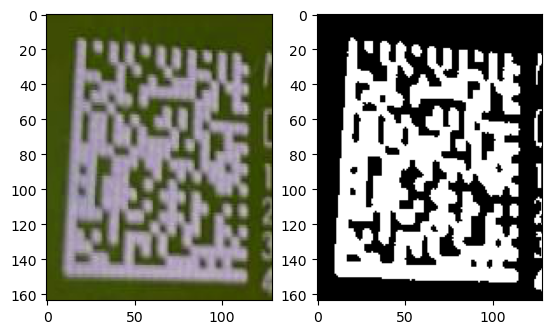

Valid decoding! #D1FPE50HA9NS0047XG264##KW8PXY3D

5/50
Dm decode rate: 0.1
Valid decode rate: 0.1


In [76]:
# Getting cropped images
model = YOLO('../yolo/models/ultralytics_finetuned.pt')

# MAN test data
img_paths = glob.glob('../data/MAN/images/test/*.jpg')

# stat tracking
num_decodings = 0
num_valid_decodings = 0

imgs = []
titles = []

idx = 0
for img_path in img_paths:
    img = cv2.imread(img_path)
    results = model(img)
    boxes = results[0].boxes.xyxy.tolist()

    actual_decoding = os.path.basename(img_path).split('_')[0]
    actual_decoding = actual_decoding.replace('-', '') # minor cleaning

    # fixing some actual decodings
    if actual_decoding == 'KV8INMEP':
        actual_decoding = '#D1FPE50HA9NS0047XG264##KV8INMEP'
    elif actual_decoding == 'KW8PXY3D':
        actual_decoding = '#D1FPE50HA9NS0047XG264##KW8PXY3D'

    if boxes != None and len(boxes) > 0:
        # only look at box with highest confidence
        box = boxes[0]

        # crop with some padding (to not have too small of a crop)
        pad = 10
        crop_obj_pre_binarize = img[max(0, int(box[1])-pad):max(0, int(box[3])+pad), max(0, int(box[0])-pad):max(0, int(box[2])+pad)]

        # binarize with otsu method
        crop_obj = binarize(crop_obj_pre_binarize)

        # show pre and post binarization crops
        plt.subplot(1, 2, 1)
        plt.imshow(crop_obj_pre_binarize)
        plt.subplot(1, 2, 2)
        plt.imshow(crop_obj, cmap='gray')
        plt.show()

        decodings = decode(crop_obj)

        if decodings != None and len(decodings) > 0:
            num_decodings += 1

            for decoding in decodings:
                decoded_string = decoding.data.decode('utf-8')
                
                if decoded_string == actual_decoding:
                    print(f'Valid decoding! {actual_decoding}')
                    num_valid_decodings += 1
                    imgs.append(crop_obj)
                    titles.append(actual_decoding)
                else:
                    print('Invalid decoding!')
                    print(actual_decoding)
                    print(decoded_string)

        # optional saving
        # cv2.imwrite(f'../data/cropped/{actual_decoding}-{idx}.jpg', crop_obj)
        idx += 1

# calculate stats
dm_decode_rate = num_decodings/len(img_paths)
valid_decode_rate = num_valid_decodings/len(img_paths)

print()
print(f'{num_valid_decodings}/{len(img_paths)}')
print(f'Dm decode rate: {dm_decode_rate}')
print(f'Valid decode rate: {valid_decode_rate}')